In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
df=pd.read_excel('C://Users//demey//Documents//2024-2025//Industry Project//Bariatric Project Study Data 2025_mod.xlsx', sheet_name='Sheet1')
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score
)
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
core_X_data=df[['gender', 'age', 'height', 'weight', 'bmi', 'family_hist_cnt', 'chronic_meds_cnt']].copy()
cm_cols= [col for col in df.columns if col.startswith('CM_')]

cm_data = df[cm_cols].fillna(0).astype(int)
cm_data
zero_only = [col for col in cm_data.columns if (cm_data[col] == 0).all()]
cm_data = cm_data.drop(columns=zero_only)

# finally, join the filtered CM_ data back into your core set
core_X_data = core_X_data.join(cm_data)
core_X_data.fillna(0, inplace=True)
print(core_X_data.isna().sum())  # should all be zero

# inspect result
print("Dropped CM columns:", zero_only)
print("Remaining columns in CM data:", cm_data.columns.tolist())

gender              0
age                 0
height              0
weight              0
bmi                 0
family_hist_cnt     0
chronic_meds_cnt    0
CM_AIDS             0
CM_ANEMDEF          0
CM_ARTH             0
CM_CHF              0
CM_DEPRESS          0
CM_DM               0
CM_DMCX             0
CM_HTN_C            0
CM_HYPOTHY          0
CM_LIVER            0
CM_OBESE            0
CM_PSYCH            0
CM_SMOKE            0
CM_APNEA            0
CM_CHOLSTRL         0
CM_OSTARTH          0
CM_HPLD             0
dtype: int64
Dropped CM columns: ['CM_ALCOHOL', 'CM_BLDLOSS', 'CM_CHRNLUNG', 'CM_COAG', 'CM_DRUG', 'CM_LYMPH', 'CM_LYTES', 'CM_METS', 'CM_NEURO', 'CM_PARA', 'CM_PERIVASC', 'CM_PULMCIRC', 'CM_RENLFAIL', 'CM_TUMOR', 'CM_ULCER', 'CM_VALVE', 'CM_WGHTLOSS']
Remaining columns in CM data: ['CM_AIDS', 'CM_ANEMDEF', 'CM_ARTH', 'CM_CHF', 'CM_DEPRESS', 'CM_DM', 'CM_DMCX', 'CM_HTN_C', 'CM_HYPOTHY', 'CM_LIVER', 'CM_OBESE', 'CM_PSYCH', 'CM_SMOKE', 'CM_APNEA', 'CM_CHOLSTRL', 'CM_OST

In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify types
num_features = core_X_data.select_dtypes(include=['int64', 'float64']).columns
cat_features = core_X_data.select_dtypes(include=['object', 'category']).columns

# Create transformers
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Apply transformation
X_prepared = preprocessor.fit_transform(core_X_data)

In [6]:
# Identify all complication-related columns
comp_cols = [col for col in df.columns if 'comp' in col.lower()]

In [7]:
comp_cols

['post_op_complication',
 'days_30_complication',
 'days_30_plus_complication',
 'minor_complication',
 'major_complication',
 'minor_comp_month_1',
 'complications',
 'surgery_complication',
 'post_op_complication.1',
 'days_30_complication.1',
 'days_30_plus_complication.1']

In [8]:
complication_data = df[['minor_complication', 'major_complication']].copy()
complication_data.head(1000)

,minor_complication,major_complication
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
339,0,0
340,0,0
341,1,0
342,0,0


In [9]:
X= X_prepared
y_major = complication_data['major_complication']
y_minor = complication_data['minor_complication']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_minor, test_size=0.2, random_state=42)

# Train model
minor_model = RandomForestClassifier(random_state=42)
minor_model.fit(X_train, y_train)

# Evaluate
y_pred = minor_model.predict(X_test)
print("Minor Complication Report:")
print(classification_report(y_test, y_pred))


Minor Complication Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        61
           1       1.00      0.12      0.22         8

    accuracy                           0.90        69
   macro avg       0.95      0.56      0.58        69
weighted avg       0.91      0.90      0.86        69



In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y_major, test_size=0.2, random_state=42)

major_model = RandomForestClassifier(random_state=42)
major_model.fit(X_train, y_train)

y_pred = major_model.predict(X_test)
print("Major Complication Report:")
print(classification_report(y_test, y_pred))


Major Complication Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       0.00      0.00      0.00         2

    accuracy                           0.97        69
   macro avg       0.49      0.50      0.49        69
weighted avg       0.94      0.97      0.96        69



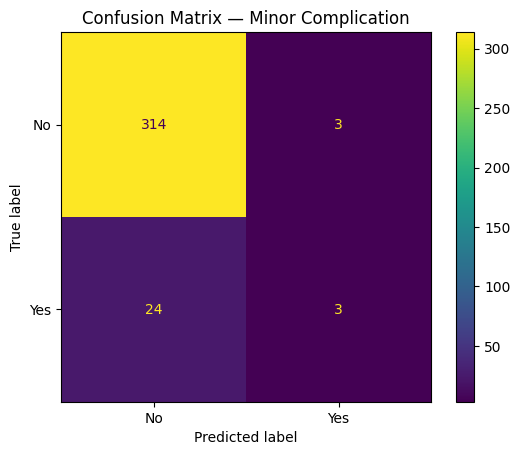

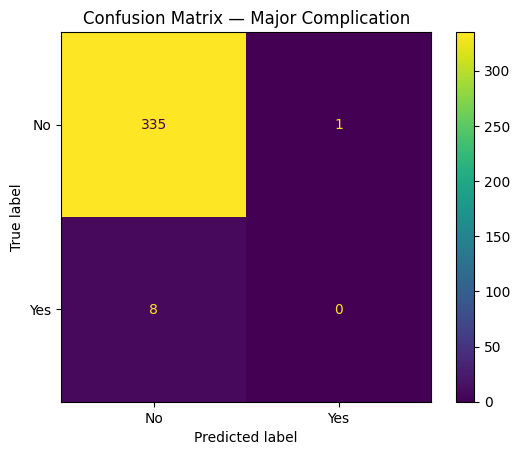


=== Minor Complication Metrics ===
              precision    recall  f1-score     support
0              0.928994  0.990536  0.958779  317.000000
1              0.500000  0.111111  0.181818   27.000000
accuracy       0.921512  0.921512  0.921512    0.921512
macro avg      0.714497  0.550824  0.570298  344.000000
weighted avg   0.895323  0.921512  0.897796  344.000000

=== Major Complication Metrics ===
              precision    recall  f1-score     support
0              0.976676  0.997024  0.986745  336.000000
1              0.000000  0.000000  0.000000    8.000000
accuracy       0.973837  0.973837  0.973837    0.973837
macro avg      0.488338  0.498512  0.493373  344.000000
weighted avg   0.953963  0.973837  0.963798  344.000000


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble       import RandomForestClassifier
from sklearn.metrics        import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_predict

# if you’ve got imblearn:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline       import Pipeline

def cv_with_ros(X, y, title, n_splits=5):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    pipe = Pipeline([
        ("ros", RandomOverSampler(random_state=42)),
        ("rf",  RandomForestClassifier(class_weight="balanced", random_state=42))
    ])

    # get out-of-fold predictions
    y_pred = cross_val_predict(pipe, X, y, cv=cv, method="predict")

    # plot confusion matrix
    cm   = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=["No","Yes"])
    disp.plot()
    plt.title(f"Confusion Matrix — {title}")
    plt.show()

    # return report as DataFrame
    rpt = classification_report(y, y_pred, output_dict=True)
    return pd.DataFrame(rpt).transpose()

# run for both tasks
minor_report = cv_with_ros(X, y_minor, "Minor Complication")
major_report = cv_with_ros(X, y_major, "Major Complication")

print("\n=== Minor Complication Metrics ===")
print(minor_report[["precision","recall","f1-score","support"]])

print("\n=== Major Complication Metrics ===")
print(major_report[["precision","recall","f1-score","support"]])


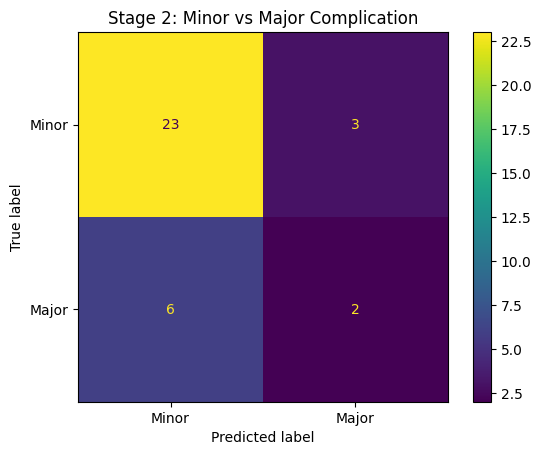

              precision    recall  f1-score   support

           0       0.79      0.88      0.84        26
           1       0.40      0.25      0.31         8

    accuracy                           0.74        34
   macro avg       0.60      0.57      0.57        34
weighted avg       0.70      0.74      0.71        34



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import StratifiedKFold

# — ASSUMPTION: X, y_minor, y_major are already defined —
# X may be a pandas DataFrame or a numpy array
# y_minor, y_major are 1D arrays or Series of 0/1 labels

# 1) Build the “any complication” mask
y_any = ((y_minor == 1) | (y_major == 1)).astype(int)
mask  = (y_any == 1)

# 2) Subset to only complication cases
if isinstance(X, pd.DataFrame):
    X_comp = X.iloc[mask.values]
else:
    X_comp = X[mask]

y_type = np.asarray(y_major)[mask]   # 1=major, 0=minor

# 3) Manual oversampling + stratified CV
cv     = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = np.zeros_like(y_type)

for train_idx, test_idx in cv.split(X_comp, y_type):
    # get train/test splits
    X_tr = X_comp.iloc[train_idx] if isinstance(X_comp, pd.DataFrame) else X_comp[train_idx]
    y_tr = y_type[train_idx]
    X_te = X_comp.iloc[test_idx]  if isinstance(X_comp, pd.DataFrame) else X_comp[test_idx]

    # manual random oversample minority class in the training fold
    classes, counts = np.unique(y_tr, return_counts=True)
    if len(classes) > 1:
        minor_cls = classes[np.argmin(counts)]
        idx_min   = np.where(y_tr == minor_cls)[0]
        n_extra   = counts.max() - counts.min()
        extra_idx = np.random.choice(idx_min, size=n_extra, replace=True)

        X_tr_bal = np.vstack([X_tr, X_tr[extra_idx]]) if not isinstance(X_tr, pd.DataFrame) else pd.concat([X_tr, X_tr.iloc[extra_idx]], ignore_index=True)
        y_tr_bal = np.concatenate([y_tr, y_tr[extra_idx]])
    else:
        X_tr_bal, y_tr_bal = X_tr, y_tr

    # train and predict
    clf = RandomForestClassifier(class_weight="balanced", random_state=42)
    clf.fit(X_tr_bal, y_tr_bal)
    y_pred[test_idx] = clf.predict(X_te)

# 4) Plot and report
cm = confusion_matrix(y_type, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Minor", "Major"])
disp.plot()
plt.title("Stage 2: Minor vs Major Complication")
plt.show()

report = classification_report(y_type, y_pred)
print(report)


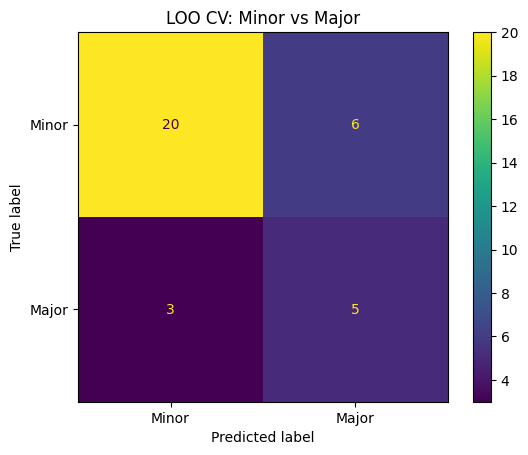

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.45      0.62      0.53         8

    accuracy                           0.74        34
   macro avg       0.66      0.70      0.67        34
weighted avg       0.77      0.74      0.75        34



In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model       import LogisticRegression
from sklearn.metrics            import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection    import LeaveOneOut

# — assume X_comp and y_type are your 34×F array/DataFrame and your [0,1] label array —
#    where 1 = major, 0 = minor

loo    = LeaveOneOut()
y_pred = np.zeros_like(y_type)
y_prob = np.zeros_like(y_type, dtype=float)

for train_idx, test_idx in loo.split(X_comp):
    # split
    X_tr, X_te = X_comp[train_idx], X_comp[test_idx]
    y_tr, y_te = y_type[train_idx], y_type[test_idx]
    
    # manual random oversampling of the minority *in the training fold*
    classes, counts = np.unique(y_tr, return_counts=True)
    if len(classes) > 1:
        minor_cls = classes[np.argmin(counts)]
        idx_min   = np.where(y_tr == minor_cls)[0]
        n_extra   = counts.max() - counts.min()
        extra     = np.random.choice(idx_min, size=n_extra, replace=True)
        
        X_tr = np.vstack([X_tr, X_tr[extra]])
        y_tr = np.concatenate([y_tr, y_tr[extra]])
    
    # train a simple, regularized model
    clf = LogisticRegression(
        penalty="l2",
        C=1.0,
        class_weight="balanced",
        solver="liblinear",
        random_state=42,
    )
    clf.fit(X_tr, y_tr)
    
    # predict on the held-out sample
    y_pred[test_idx] = clf.predict(X_te)
    y_prob[test_idx] = clf.predict_proba(X_te)[:,1]

# aggregate results
cm = confusion_matrix(y_type, y_pred)
Disp = ConfusionMatrixDisplay(cm, display_labels=["Minor","Major"])
Disp.plot()
plt.title("LOO CV: Minor vs Major")  
plt.show()

print(classification_report(y_type, y_pred))

# y_prob is the LOO‐estimated P(major|complication) for each sample,
# which you can multiply by P(any_complication) from Stage 1.


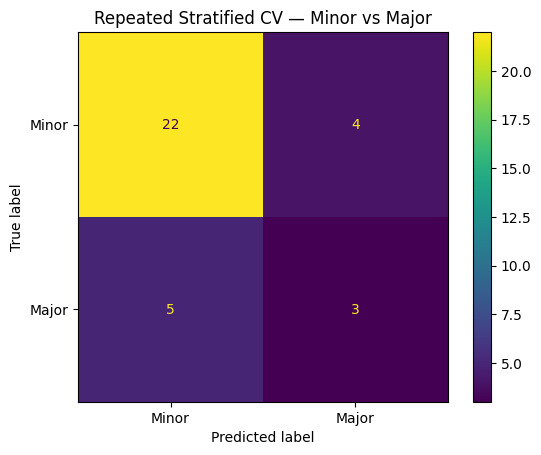

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        26
           1       0.43      0.38      0.40         8

    accuracy                           0.74        34
   macro avg       0.62      0.61      0.62        34
weighted avg       0.72      0.74      0.73        34

Brier score (major prob): 0.157


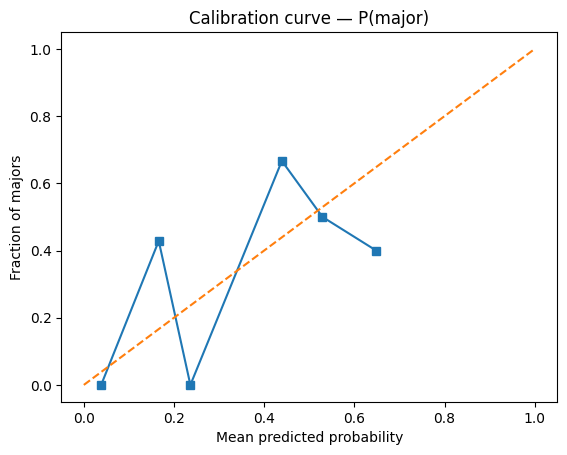

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model       import LogisticRegression
from sklearn.metrics            import confusion_matrix, ConfusionMatrixDisplay, classification_report, brier_score_loss
from sklearn.model_selection    import RepeatedStratifiedKFold
from sklearn.calibration        import CalibratedClassifierCV
from imblearn.over_sampling     import RandomOverSampler
from imblearn.pipeline          import Pipeline
from sklearn.base               import clone

# — assume X_comp (34×F array or DataFrame) and y_type (length-34 array) are defined —

# 1) Build & calibrate your base pipeline
base = Pipeline([
    ("ros", RandomOverSampler(random_state=42)),
    ("clf", LogisticRegression(
        penalty="l2",
        C=1.0,
        class_weight="balanced",
        solver="liblinear",
        random_state=42
    ))
])
# wrap for probability calibration
cal = CalibratedClassifierCV(base, cv=5, method="isotonic")

# 2) Prepare repeated stratified splits
rs = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# placeholders
y_probs  = np.zeros(len(y_type))
y_counts = np.zeros(len(y_type))
y_preds  = np.zeros(len(y_type), dtype=int)

# 3) Loop through folds, fit on TRAIN only, predict on TEST
for train_idx, test_idx in rs.split(X_comp, y_type):
    X_tr = X_comp.iloc[train_idx] if hasattr(X_comp, "iloc") else X_comp[train_idx]
    y_tr = y_type[train_idx]
    X_te = X_comp.iloc[test_idx]  if hasattr(X_comp, "iloc") else X_comp[test_idx]

    # fit a fresh calibrated model
    cal_fold = clone(cal)
    cal_fold.fit(X_tr, y_tr)
    
    # collect probabilities
    probs = cal_fold.predict_proba(X_te)[:,1]
    y_probs[test_idx] += probs
    y_counts[test_idx] += 1

# 4) Average probs & get final class predictions
y_probs /= y_counts
y_preds  = (y_probs >= 0.5).astype(int)

# 5) Confusion matrix + report
cm = confusion_matrix(y_type, y_preds)
disp = ConfusionMatrixDisplay(cm, display_labels=["Minor","Major"])
disp.plot()
plt.title("Repeated Stratified CV — Minor vs Major")
plt.show()

print(classification_report(y_type, y_preds))

# 6) Calibration check
brier = brier_score_loss(y_type, y_probs)
print(f"Brier score (major prob): {brier:.3f}")

from sklearn.calibration import calibration_curve
frac_pos, mean_pred = calibration_curve(y_type, y_probs, n_bins=10)
plt.plot(mean_pred, frac_pos, "s-")
plt.plot([0,1],[0,1],"--")
plt.title("Calibration curve — P(major)")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of majors")
plt.show()


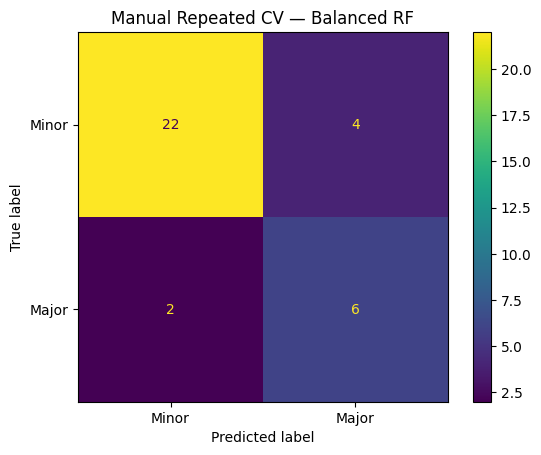

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.60      0.75      0.67         8

    accuracy                           0.82        34
   macro avg       0.76      0.80      0.77        34
weighted avg       0.84      0.82      0.83        34



In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics            import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection    import RepeatedStratifiedKFold
from sklearn.base               import clone
from imblearn.ensemble          import BalancedRandomForestClassifier

# — assume X_comp (34×F array or DataFrame) and y_type (length-34 0/1 array) are defined —

# 1) Define your balanced random forest
base_clf = BalancedRandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# 2) Set up repeated stratified splits
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# placeholders for accumulating
n_samples  = len(y_type)
vote_probs = np.zeros(n_samples)
vote_counts = np.zeros(n_samples)
vote_preds = np.zeros(n_samples, dtype=int)

# 3) Loop over each split, fit & predict
for train_idx, test_idx in rkf.split(X_comp, y_type):
    # extract training & test fold
    X_tr = X_comp.iloc[train_idx] if hasattr(X_comp, "iloc") else X_comp[train_idx]
    y_tr = y_type[train_idx]
    X_te = X_comp.iloc[test_idx]  if hasattr(X_comp, "iloc") else X_comp[test_idx]
    
    # clone the classifier so we start fresh each fold
    clf = clone(base_clf)
    clf.fit(X_tr, y_tr)
    
    # get probabilities and predictions on the test fold
    probs = clf.predict_proba(X_te)[:,1]
    preds = clf.predict(X_te)
    
    # accumulate
    vote_probs[test_idx]  += probs
    vote_counts[test_idx] += 1
    vote_preds[test_idx]  += preds

# 4) Compute averaged probability & majority vote prediction
avg_probs = vote_probs / vote_counts
final_preds = (avg_probs >= 0.5).astype(int)  # or keep avg_probs for risk scores

# 5) Confusion matrix & report
cm = confusion_matrix(y_type, final_preds)
disp = ConfusionMatrixDisplay(cm, display_labels=["Minor","Major"])
disp.plot()
plt.title("Manual Repeated CV — Balanced RF")
plt.show()

print(classification_report(y_type, final_preds))


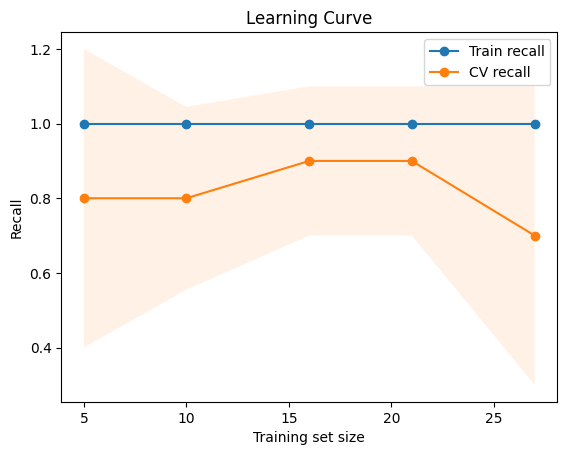

In [17]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# clf = your classifier (e.g. BalancedRandomForestClassifier or LogisticRegression)
# X_comp, y_type = your 34×F data and labels

train_sizes, train_scores, test_scores = learning_curve(
    clf, X_comp, y_type,
    train_sizes=[0.2, 0.4, 0.6, 0.8, 1.0],
    cv=5,
    scoring="recall",
    n_jobs=-1
)

# Compute means & stds over folds
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores,  axis=1)
test_mean  = np.mean(test_scores,  axis=1)
test_std   = np.std(test_scores,   axis=1)

# Plot
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean-test_std,   test_mean+test_std,   alpha=0.1)
plt.plot(train_sizes, train_mean, 'o-', label='Train recall')
plt.plot(train_sizes, test_mean,  'o-', label='CV recall')
plt.xlabel('Training set size')
plt.ylabel('Recall')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


In [18]:
from sklearn.ensemble        import BaggingClassifier
from sklearn.linear_model   import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

# 1) Base model: regularized logistic
base_clf = LogisticRegression(
    penalty="l2",
    C=0.1,
    class_weight="balanced",
    solver="liblinear",
    random_state=42
)

# 2) Bagging wrapper (use `estimator=` not `base_estimator=`)
bag_clf = BaggingClassifier(
    estimator=base_clf,
    n_estimators=100,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# 3) Evaluate with repeated stratified CV
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
scores = cross_val_score(bag_clf, X_comp, y_type, cv=cv, scoring="recall", n_jobs=-1)

print(f"Recall: {scores.mean():.2f} ± {scores.std():.2f}")


Recall: 0.78 ± 0.29


In [19]:
from joblib import load
model_any = load("backend/best_model_pipeline_R42.pkl")

# Stage-2: major vs minor, bagged logistic
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

base_clf = LogisticRegression(
    penalty="l2", C=0.1, class_weight="balanced",
    solver="liblinear", random_state=42
)
model_type = BaggingClassifier(
    estimator=base_clf, n_estimators=100,
    bootstrap=True, random_state=42, n_jobs=-1
)
model_type.fit(X_comp, y_type)  # X_comp, y_type are your 34 complication cases


BaggingClassifier(estimator=LogisticRegression(C=0.1, class_weight='balanced',
                                               random_state=42,
                                               solver='liblinear'),
                  n_estimators=100, n_jobs=-1, random_state=42)